# Parte uno: análisis de los archivos proporcionados con Pandas

In [ ]:
#Importo la librería y la renombro
import pandas as pd

#Leo todos los csv con Pandas
customers = pd.read_csv('ecommerce_customers_dataset.csv')
order_items = pd.read_csv('ecommerce_order_items_dataset.csv')
order_payments = pd.read_csv('ecommerce_order_payments_dataset.csv')
orders = pd.read_csv('ecommerce_orders_dataset.csv')
products = pd.read_csv('ecommerce_products_dataset.csv')

Exploración inicial de cada df por separado utilizando:
*   .info() : muestra un resumen del df, incluyendo información sobre el tipo de los índices de filas y columnas, los valores no nulos y la memoria usada.
*   .head() : muestra las primeras n filas.
*   .shape() : devuelve la cantidad de filas y columnas.
*   .describe() : muestra variables estadísticas de las columnas numéricas del df.

In [ ]:
#Df customers
customers.info()
customers.head()
customers.shape #El df tiene 99441 filas y 5 columnas
customers.describe()

In [ ]:
#Df order_items
order_items.info()
order_items.head()
order_items.shape #El df tiene 112650 filas y 7 columnas
order_items.describe()

In [ ]:
#Df order_payments
order_payments.info()
order_payments.head()
order_payments.shape #El df tiene 103886 filas y 5 columnas
order_payments.describe()

In [ ]:
#Df orders
orders.info()
orders.head()
orders.shape #El df tiene 99441 filas y 8 columnas
orders.describe()

In [ ]:
#Df products
products.info()
products.head()
products.shape #El df tiene 32951 filas y 9 columnas
products.describe()

# Parte dos: actividades con Pandas

A cada df cargado le indico como índice la clave primaria de la tabla

In [ ]:
#A customers le asigno como índice "customer_id"
customers.set_index('customer_id', inplace=True)

#Chequeo que se haya seteado bien el índice indicado
print(customers.index)

In [ ]:
#A order_items le asigno como índice "order_id"
order_items.set_index('order_id', inplace=True)

#Chequeo que se haya seteado bien el índice indicado
print(order_items.index)

In [ ]:
#A order_payments le asigno como índice "order_id"
order_payments.set_index('order_id', inplace=True)

#Chequeo que se haya seteado bien el índice indicado
print(order_payments.index)

In [ ]:
#A orders le asigno como índice "order_id"
orders.set_index('order_id', inplace=True)

#Chequeo que se haya seteado bien el índice indicado
print(orders.index)

In [ ]:
#A products le asigno como índice "product_id"
products.set_index('product_id', inplace=True)

#Chequeo que se haya seteado bien el índice indicado
print(products.index)

Obtengo el número total de clientes únicos

In [ ]:
#Obtengo los valores únicos de customers
unicos = customers['customer_unique_id'].unique()

#Cuento la cantidad de valores únicos
cantidad_unicos = len(unicos)

print("El número total de clientes únicos es:", cantidad_unicos)

Calculo el promedio de valor de pago por pedido

In [ ]:
#Agrupo los pedidos por order_id y luego a la columna payment_value le saco el promedio.
promedio_pago_pedido = order_payments.groupby('order_id')['payment_value'].mean()

#Ordeno el df de mayor a menor
ordenado = promedio_pago_pedido.sort_values(ascending=False)
#print(ordenado)

#No tiene sentido realizar un analisis de promedio de valor de pago por pedido como indica la consigna
#Por eso, utilizando la misma tabla (order_payments)
#Decidí agrupar por el tipo de pago y según cada uno, hacer un promedio del valor de pago.

#Agrupo los pedidos por payment_type y luego a la columna payment_value le saco el promedio.
promedio_tipo_pago = order_payments.groupby('payment_type')['payment_value'].mean()

#Ordeno el df de mayor a menor
ordenado2 = promedio_tipo_pago.sort_values(ascending=False)
print(ordenado2)

Determino la categoría de producto más vendida

In [ ]:
#Hago un merge entre la tabla order_items y products usando como nexo 'product_id'
merged_df = pd.merge(order_items, products, on='product_id')

#Selecciono la columna de categoría y con el value_counts cuento cuantas veces aparece cada categoría.
#Con el head(1) muestro la primera
cat_mas_vendida = merged_df['product_category_name'].value_counts().head(1)

print("La categoría de producto más vendida es:", cat_mas_vendida.index[0])

Calculo el número total de pedidos realizados

In [ ]:
#Calculo la cantidad de elementos presente en el dataframe de orders, que corresponde a la cantidad total de pedidos realizados.
print("El número total de pedidos realizados es:", len(orders))

# Parte tres: actividades con SQLite

In [ ]:
#Importo la librería y la renombro
import sqlite3 as sql

#Crear y conectar a la base de datos 'ecommerce.db'
conn = sql.connect('ecommerce.db.sqlite')
cursor = conn.cursor()

#Creación de todas las tablas
create_table_query = '''
CREATE TABLE customers (
    customer_id TEXT PRIMARY KEY,
    customer_unique_id TEXT,
    customer_zip_code_prefix INTEGER,
    customer_city TEXT,
    customer_state TEXT
);

CREATE TABLE order_items (
    order_id TEXT,
    order_item_id INTEGER,
    product_id TEXT,
    seller_id TEXT,
    shipping_limit_date TEXT,
    price REAL,
    freight_value REAL,
    PRIMARY KEY (order_id, order_item_id)
);

CREATE TABLE order_payments (
    order_id TEXT,
    payment_sequential INTEGER,
    payment_type TEXT,
    payment_installments INTEGER,
    payment_value REAL,
    PRIMARY KEY(order_id,payment_sequential)
);

CREATE TABLE orders (
    order_id TEXT PRIMARY KEY,
    customer_id TEXT,
    order_status TEXT,
    order_purchase_timestamp TEXT,
    order_approved_at TEXT,
    order_delivered_carrier_date TEXT,
    order_delivered_customer_date TEXT,
    order_estimated_delivery_date TEXT
);

CREATE TABLE products (
    product_id TEXT PRIMARY KEY,
    product_category_name TEXT,
    product_name_lenght REAL,
    product_description_lenght REAL,
    product_photos_qty REAL,
    product_weight_g REAL,
    product_length_cm REAL,
    product_height_cm REAL,
    product_width_cm REAL
);
'''

#Ejecuto la sentencia de creación de tablas.
#Uso el executescript porque tengo más de una sentencia sql en create_table_query.
cursor.executescript(create_table_query)

Guardo los df en la base de datos como tablas


In [ ]:
customers.to_sql('customers', conn, index=True, if_exists='replace')
order_items.to_sql('order_items', conn, index=True, if_exists='replace')
order_payments.to_sql('order_payments', conn, index=True, if_exists='replace')
orders.to_sql('orders', conn, index=True, if_exists='replace')
products.to_sql('products', conn, index=True, if_exists='replace')

## Consulta PRAGMA

Obtener la estructura de las tablas y guardar la info en un archivo con extensión .info.

In [ ]:
tablas = ['customers', 'order_items', 'order_payments', 'orders', 'products']

with open('estructuras.info', 'w') as file:
  for tabla in tablas:
    resultados =cursor.execute(f"PRAGMA table_info({tabla})").fetchall()  #Obtengo información de las tablas
    print(resultados, file=file)

Obtener los nombres de los índices de las tablas y guardar la info a un archivo con extensión .info.

In [ ]:
tablas = ['customers', 'order_items', 'order_payments', 'orders', 'products']
indices = []

with open('indices.info', 'w') as file:
  for tabla in tablas:
    resultados =cursor.execute(f"PRAGMA index_list({tabla})").fetchall()  #Obtengo información del índice
    indice = cursor.execute(f"PRAGMA index_info({resultados[0][1]})").fetchall() #Obtengo el nombre del índice
    indices.append(indice[0][2])
  print(indices, file=file)

## Consultas SELECT

### Análisis del comportamiento de compra de los clientes

Calculo el valor promedio de los pedidos realizados por cada cliente.

In [ ]:
query = '''SELECT c.customer_unique_id as id_cliente, o.order_id as id_orden, AVG(i.price + i.freight_value) as valor_promedio
          FROM customers c
          JOIN orders o
          ON c.customer_id = o.customer_id
          JOIN order_items i
          ON i.order_id = o.order_id
          GROUP BY c.customer_unique_id
          ORDER BY valor_promedio DESC;
        '''
valor_promedio_df = pd.read_sql_query(query, conn)
valor_promedio_df

In [ ]:
#Exporto los resultados de la consulta a un archivo CSV
valor_promedio_df.to_csv('valor_promedio_pedidos_clientes.csv', index=False)

Identifico a los clientes con los pedidos de mayor valor.

In [ ]:
query = '''SELECT c.customer_unique_id as id_cliente, SUM(i.price + i.freight_value) as maximo_valor
          FROM customers c
          JOIN orders o
          ON c.customer_id = o.customer_id
          JOIN order_items i
          ON i.order_id = o.order_id
          GROUP BY c.customer_unique_id
          ORDER BY maximo_valor DESC;
        '''
maximo_valor_df = pd.read_sql_query(query, conn)
maximo_valor_df

In [ ]:
#Exporto los resultados de la consulta a un archivo CSV
maximo_valor_df.to_csv('clientes_pedidos_mayor_valor.csv', index=False)

Calculo la frecuencia promedio de compra por cliente (la cantidad de pedidos realizados en un período de tiempo determinado).

In [ ]:
#Para calcular la frecuencia promedio de compra, dividí el número total de pedidos en un periodo de tiempo determinado
#entre el número total de ordenes.
#Periodo de tiempo determinado = tiempo entre la primer y última compra que realizó el cliente.

query = '''SELECT c.customer_unique_id as id_cliente, count(o.order_id) as total_ordenes,
          ((julianday(MAX(o.order_purchase_timestamp))- julianday(MIN(o.order_purchase_timestamp))) / (count(o.order_id)-1)) as frecuencia_promedio_dias
          FROM customers c
          JOIN orders o
          ON c.customer_id = o.customer_id
          GROUP BY c.customer_unique_id
          HAVING frecuencia_promedio_dias > 0
          ORDER BY frecuencia_promedio_dias ASC;
        '''
frecuencia = pd.read_sql_query(query, conn)
frecuencia

In [ ]:
#Exporto los resultados de la consulta a un archivo CSV
frecuencia.to_csv('frecuencia_promedio_compra.csv', index=False)

### Informe del análisis de comportamiento de compra de los clientes

<Axes: title={'center': 'Top 10 clientes más frecuentes'}, xlabel='id cliente', ylabel='Frecuencia promedio de compra (días)'>

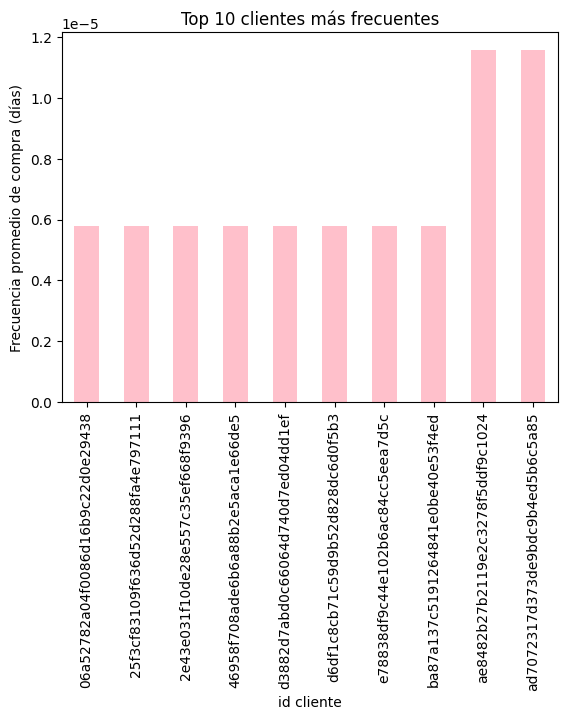

In [ ]:
import matplotlib.pyplot as plt

#Gráfico
#Muestro los 10 clientes más frecuentes ordenados de manera ascendente
top_frecuencia = frecuencia.sort_values(by='frecuencia_promedio_dias', ascending=True).head(10)

top_frecuencia.plot(kind='bar', title='Top 10 clientes más frecuentes', x='id_cliente', y='frecuencia_promedio_dias', ylabel='Frecuencia promedio de compra (días)', xlabel='id cliente', color='pink', legend= '')

Utilizando datos de la tabla customers, orders y order_items se llego a la conclusión de que el máximo valor promedio de compra por cliente es de 6929.310000 USD, mientras que el mínimo valor promedio de compra por cliente es de 9.341429 USD.

Analizando la frecuencia promedio de compra por día, se observó que hay clientes que compran más de una vez por día, mientras que otros lo hacen cada 608 días aproximadamente. Además, se realizó un gráfico del top 10 de clientes con menor frecuencia promedio de compra, es decir, un top 10 de aquellos cliente que compran más.

### Análisis de popularidad de productos por categoría


Agrupo los productos por categoría y calculo la cantidad total de unidades vendidas para cada categoría

In [ ]:
query = '''SELECT p.product_category_name as categoria_producto, COUNT(i.order_item_id) as cantidad_total_vendida
          FROM products p
          JOIN order_items i
          ON p.product_id = i.product_id
          GROUP BY categoria_producto
          ORDER BY cantidad_total_vendida DESC;
        '''
categoria = pd.read_sql_query(query, conn)
categoria

#Si quiero ver las 5 primeras categorías con mayor cantidad de productos vendidos puedo agregar a la query LIMIT 5

In [ ]:
#Exporto los resultados de la consulta a un archivo CSV
categoria.to_csv('productos_por_categoria.csv', index=False)

### Informe del análisis de popularidad de productos por categoría

<Axes: title={'center': 'Top 5 productos por categoría'}, xlabel='Categoria producto', ylabel='Cantidad total vendida'>

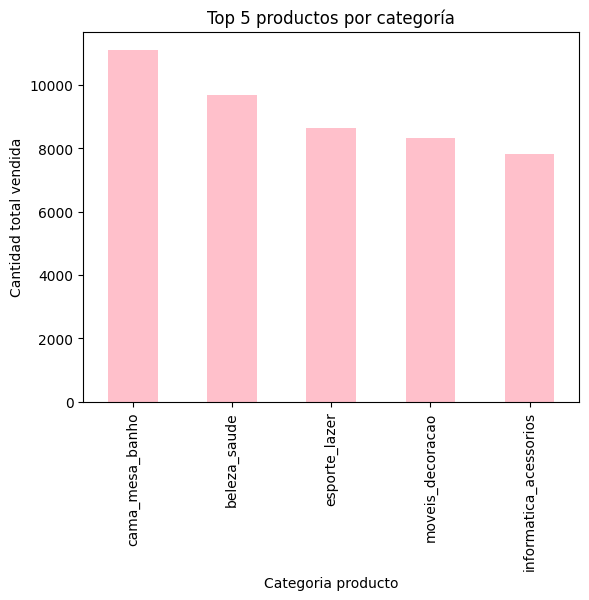

In [ ]:
#Gráfico
categoria_grafico = categoria.groupby('categoria_producto')['cantidad_total_vendida'].sum()

#Muestro las primeras 5 categorías con productos más vendidos ordenada de manera descendente
top_categoria = categoria_grafico.sort_values(ascending=False).head(5)
top_categoria.plot(kind='bar', title='Top 5 productos por categoría', xlabel='Categoria producto', ylabel='Cantidad total vendida', color='pink')

Utilizando datos de la tabla products y order_items se llego a la conclusión de que las primeras 5 categorías de productos más populares en términos de ventas son *'cama_mesa_banho', 'movels_decoracao', 'beleza_saude', 'esporte_laze' y 'informatica_acessorios'*. Lo mismo puede observarse en el gráfico de barras realizado.

### Análisis de la satisfacción del cliente basado en la velocidad de entrega

Calculo el tiempo promedio de entrega de los pedidos por cliente.

In [ ]:
query = '''SELECT c.customer_id as id_cliente, AVG(julianday(o.order_delivered_customer_date) - julianday(o.order_purchase_timestamp)) as tiempo_promedio_entrega
          FROM customers c
          JOIN orders o
          ON c.customer_id = o.customer_id
          WHERE o.order_delivered_customer_date IS NOT NULL
          GROUP BY c.customer_id
          ORDER BY tiempo_promedio_entrega ASC;
        '''
tiempo_promedio_entrega = pd.read_sql_query(query, conn)
tiempo_promedio_entrega

In [ ]:
#Exporto los resultados de la consulta a un archivo CSV
tiempo_promedio_entrega.to_csv('tiempo_promedio_entrega.csv', index=False)

([<matplotlib.axis.XTick at 0x7942d28c5b10>,
 [Text(0, 0, '96466'),
  Text(1, 0, '96467'),
  Text(2, 0, '96468'),
  Text(3, 0, '96469'),
  Text(4, 0, '96470'),
  Text(5, 0, '96471'),
  Text(6, 0, '96472'),
  Text(7, 0, '96473'),
  Text(8, 0, '96474'),
  Text(9, 0, '96475')])

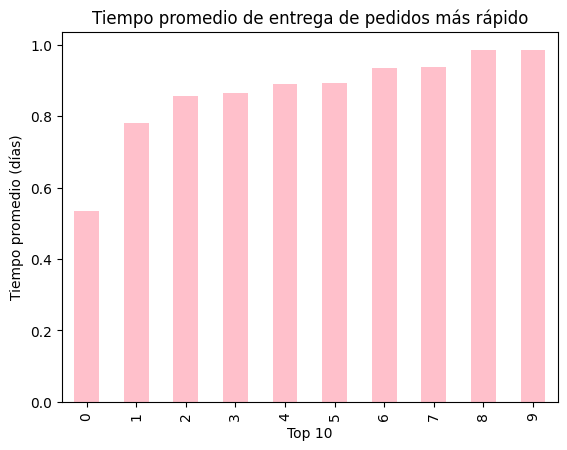

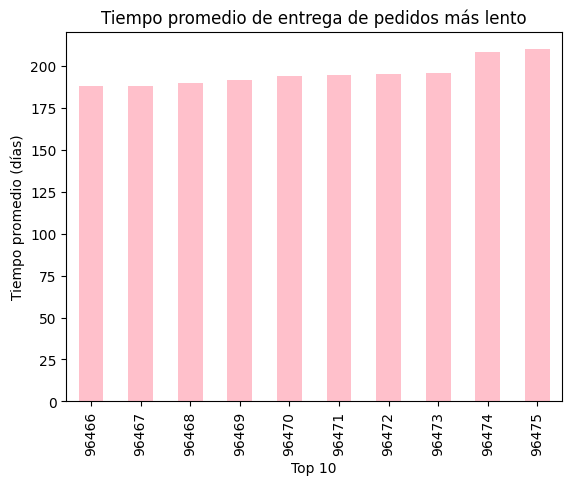

In [ ]:
import matplotlib.pyplot as plt

#Gráfico
#Ordeno el tiempo promedio de entrega por pedidos y muestro los primeros 10, que serían los pedidos más rápidos
tiempo_entrega_rapido = tiempo_promedio_entrega.sort_values(by='tiempo_promedio_entrega', ascending=True).head(10)
values=(0,1,2,3,4,5,6,7,8,9)
tiempo_entrega_rapido.plot(kind='bar', title='Tiempo promedio de entrega de pedidos más rápido', y='tiempo_promedio_entrega', xlabel='Top 10', ylabel='Tiempo promedio (días)', color='pink', legend= '')
plt.xticks(values)

#Gráfico
#Ordeno el tiempo promedio de entrega por pedidos y muestro los últimos 10, que serían los pedidos más lentos
tiempo_entrega_lentos = tiempo_promedio_entrega.sort_values(by='tiempo_promedio_entrega', ascending=True).tail(10)
values1=(0,1,2,3,4,5,6,7,8,9)
tiempo_entrega_lentos.plot(kind='bar', title='Tiempo promedio de entrega de pedidos más lento', y='tiempo_promedio_entrega', xlabel='Top 10', ylabel='Tiempo promedio (días)', color='pink', legend = '')
plt.xticks(values1)

### Informe de la satisfacción del cliente basado en la velocidad de entrega

Utilizando datos de la tabla customers y orders y analizando los gráficos de barras realizados, se llego a la conclusión de hay clientes que poseen tiempos de entrega menores a un día mientras que hay otros clientes que poseen tiempos de entrega superior a doscientos días.

### Análisis del rendimiento de los métodos de pago utilizados por los clientes

Agrupo los pagos por método de pago y calculo el total de pagos realizados con cada método.

In [ ]:
query = '''SELECT op.payment_type as tipo_de_pago, ROUND(SUM(op.payment_value), 2) as total_pagos
          FROM customers c
          JOIN orders o
          ON c.customer_id = o.customer_id
          JOIN order_payments op
          ON op.order_id = o.order_id
          GROUP BY op.payment_type
          ORDER BY total_pagos DESC
        '''
metodo_pago = pd.read_sql_query(query, conn)
metodo_pago

In [ ]:
#Exporto los resultados de la consulta a un archivo CSV
metodo_pago.to_csv('metodo_pago.csv', index=False)

### Informe del rendimiento de los métodos de pago utilizados por los clientes

<Axes: title={'center': 'Métodos de pago utilizados por clientes'}, ylabel='total_pagos'>

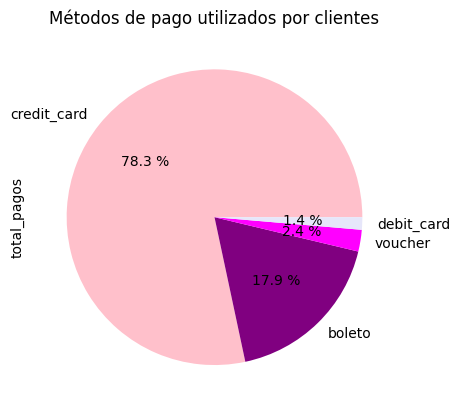

In [ ]:
import matplotlib.pyplot as plt

#Gráfico
#Ordeno de manera descendente, como veo que el not_defined tiene un total de pagos = 0, no lo gráfico.
metodo_pago_ordenado = metodo_pago.sort_values(by='total_pagos', ascending=False).head(4)

labels = ('credit_card', 'boleto', 'voucher', 'debit_card')
colores = ['pink', 'purple', 'fuchsia', 'lavender']
metodo_pago_ordenado.plot.pie(title='Métodos de pago utilizados por clientes', y='total_pagos', labels=labels, autopct="%0.1f %%", legend='', colors=colores)

Utilizando datos de la tabla customers, orders y order_payments y analizando el gráfico de torta, se llego a la conclusión de que los métodos de pago más utilizados por los clientes son en orden descendente: *debit_card* con un porcentaje del 78.3%, *boleto* con un porcentaje del 17.9%, *voucher* con un porcentaje del 2.4% y, por último, *debit_card* con un porcentaje del 1.4%.